In [1]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/usr/lib/python3/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/lib/python3/dist-packages/traitlets/config/application.py", line 846, in launch_instance
    app.start()
  File "/usr/lib/python3/dist-packages/ipykernel/kernelapp.py", line 677, in start
    s

AttributeError: _ARRAY_API not found

/home/thakur/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
all_data_path=Path('/home/thakur/lccfiles')

In [56]:
#creating a directory at lccfiles to save the efficiency files
eff_plot_dir=all_data_path/'efficiency_plots_dir'

if not eff_plot_dir.is_dir():
    print(f"{eff_plot_dir} doesnot exist, creating ...")
    eff_plot_dir.mkdir()
else:
    print(f"{eff_plot_dir} exists, processing ...")

/home/thakur/lccfiles/efficiency_plots_dir doesnot exist, creating ...


In [3]:
all_files=[i for i in all_data_path.rglob('*')]


In [4]:
#.dat files
correction_data_files=sorted([j for j in all_files if j.suffix=='.dat' and j.name.startswith('correction') and (j.parent.name==j.stem.removeprefix('correction_'))])
correction_data_files

[PosixPath('/home/thakur/lccfiles/cornercorner1122_side0.01mm/correction_cornercorner1122_side0.01mm.dat'),
 PosixPath('/home/thakur/lccfiles/cornercorner1122_side0.025mm/correction_cornercorner1122_side0.025mm.dat'),
 PosixPath('/home/thakur/lccfiles/cornercorner1122_side0.05mm/correction_cornercorner1122_side0.05mm.dat'),
 PosixPath('/home/thakur/lccfiles/cornercorner1122_side0.1mm/correction_cornercorner1122_side0.1mm.dat'),
 PosixPath('/home/thakur/lccfiles/cornercorner1122_side0.2mm/correction_cornercorner1122_side0.2mm.dat'),
 PosixPath('/home/thakur/lccfiles/cornercorner1122_side0.3mm/correction_cornercorner1122_side0.3mm.dat'),
 PosixPath('/home/thakur/lccfiles/cornercorner1122_side1.0mm/correction_cornercorner1122_side1.0mm.dat'),
 PosixPath('/home/thakur/lccfiles/cornercorner1122_side1.25mm/correction_cornercorner1122_side1.25mm.dat'),
 PosixPath('/home/thakur/lccfiles/cornercorner1122_side1.2mm/correction_cornercorner1122_side1.2mm.dat'),
 PosixPath('/home/thakur/lccfiles/co

In [5]:
for c,file in enumerate(correction_data_files):
    print(f"{c:<4}{file}")

0   /home/thakur/lccfiles/cornercorner1122_side0.01mm/correction_cornercorner1122_side0.01mm.dat
1   /home/thakur/lccfiles/cornercorner1122_side0.025mm/correction_cornercorner1122_side0.025mm.dat
2   /home/thakur/lccfiles/cornercorner1122_side0.05mm/correction_cornercorner1122_side0.05mm.dat
3   /home/thakur/lccfiles/cornercorner1122_side0.1mm/correction_cornercorner1122_side0.1mm.dat
4   /home/thakur/lccfiles/cornercorner1122_side0.2mm/correction_cornercorner1122_side0.2mm.dat
5   /home/thakur/lccfiles/cornercorner1122_side0.3mm/correction_cornercorner1122_side0.3mm.dat
6   /home/thakur/lccfiles/cornercorner1122_side1.0mm/correction_cornercorner1122_side1.0mm.dat
7   /home/thakur/lccfiles/cornercorner1122_side1.25mm/correction_cornercorner1122_side1.25mm.dat
8   /home/thakur/lccfiles/cornercorner1122_side1.2mm/correction_cornercorner1122_side1.2mm.dat
9   /home/thakur/lccfiles/cornercorner1122_side1.30mm/correction_cornercorner1122_side1.30mm.dat
10  /home/thakur/lccfiles/cornercorner

In [6]:
! cat "{correction_data_files[0]}"

am241  am241  59.5409 2.067083e-01 5.181612e-03 5.086369e-03 4.111876e-03 4.083877e-03 1.509192e-02 1.494725e-02
pb210  pb210  46.5390 9.597140e-02 1.296506e+01 -5.242748e+00 -3.827653e+02 6.273450e+02 2.010299e-02 2.006625e-02
ra226  ra226  186.2110 7.919167e-01 3.161688e-02 3.090739e-02 2.919653e-02 2.869140e-02 1.500987e-02 1.491932e-02
ra226  pb214  241.9950 7.783093e-01 2.054300e-02 2.027855e-02 1.677014e-02 1.664422e-02 1.500987e-02 1.491932e-02
ra226  pb214  258.8600 5.904243e-01 1.357093e-01 1.305255e-01 1.355351e-01 1.304422e-01 1.500987e-02 1.491932e-02
ra226  pb214  274.8000 1.154155e+00 2.184246e-01 2.001445e-01 2.175071e-01 1.996350e-01 1.500987e-02 1.491932e-02
ra226  pb214  295.2228 8.230936e-01 1.564150e-02 1.543825e-02 9.537870e-03 9.451061e-03 1.500987e-02 1.491932e-02
ra226  pb214  351.9321 8.010619e-01 1.376020e-02 1.357495e-02 6.614226e-03 6.592530e-03 1.500987e-02 1.491932e-02
ra226  pb214  462.0200 6.805935e-01 1.824745e-01 1.728963e-01 1.824303e-01 1.719448e-01 

# INFO FROM CODE

In [7]:
  # [ words[0],        # 0: parent
  #             words[1] ],      # 0: isotope
  #           float(words[2]),   # 1: energy
  #           float(words[3]),   # 2: efficiency correction
  #           float(words[4]),   # 3: total error for a single gamma-ray (minus)
  #           float(words[5]),   # 4: total error for a single gamma-ray (plus)
  #           float(words[6]),   # 5: uncorrelated error (minus)
  #           float(words[7]),   # 6: uncorrelated error (plus)
  #           float(words[8]),   # 7: fractional correlated error (minus)
  #           float(words[9]) ]) # 8: fractional correlated error (plus)

# pyplot.errorbar(data[:,1], data[:,2], yerr=[data[:,5], data[:,6]], fmt='.' )
#count begins from 3, energy,efficiency correction,uncorrelated error minus,uncorrecleted plus

In [8]:
corr_data_column_names=['parent','isotope','energy','efficiency','total_error_minus','total_error_plus','error_minus','error_plus','correlated_error_minus','correlated_error_plus']
selected_columns=['side_dead_layer_thickness','parent','isotope','energy','efficiency','error_minus','error_plus']

In [9]:
# df=pd.read_csv(file_selected,sep='\s+',names=corr_data_column_names)
# df.insert(0,selected_columns[0],SideDeadLayerThickness) #side dead layer  is inserted 
# df

In [10]:
# df_plot=df[selected_columns]
# df_plot

In [11]:
# unique_parents=pd.unique(df_plot['parent'])
# unique_parents

In [12]:
# selected_parent='am241'
# df_parent=df_plot[df_plot['parent']==selected_parent]
# df_parent

In [13]:
selected_columns=['side_dead_layer_thickness(mm)','parent','isotope','energy','efficiency','error_minus','error_plus']
def get_parent_efficiency(selected_file,isotope=None):
    #print(f'selected_file: {selected_file}')
    side_thickness=selected_file.stem.split('_')[2].lstrip('side').rstrip('mm')
    #print(f'side_dead_layer_thickness: {side_thickness} mm\n')
    
    corr_data_column_names=['parent','isotope','energy','efficiency','total_error_minus','total_error_plus','error_minus','error_plus','correlated_error_minus','correlated_error_plus']
    
    
    df=pd.read_csv(selected_file,sep='\s+',names=corr_data_column_names)
    df.insert(0,selected_columns[0],side_thickness) #side dead layer  is inserted 
    #print(f'df:\n{df.to_string()}')
    if isotope:
        df_selected=df[selected_columns].query('parent==@isotope')
    else:
        df_selected=df.copy()
    #print(f'df_selected:\n{df_selected.to_string()}\n')
    return df_selected
    
    
    

In [14]:
dfs=[]
def get_combined_parent_efficiency(isotope=None,combined_correction_file=correction_data_files):
    for c,file in enumerate(combined_correction_file,start=1):
        print(f'{c:<2}|{len(combined_correction_file)} working with {file}\n')
        temp_df=get_parent_efficiency(file,isotope)
        #print(f'temp_df\n{temp_df}')
        dfs.append(temp_df)
    return pd.concat(dfs).sort_values(by='side_dead_layer_thickness(mm)').reset_index(drop=True)
        #get 
    

In [15]:

df_all=get_combined_parent_efficiency()
df_all

1 |12 working with /home/thakur/lccfiles/cornercorner1122_side0.01mm/correction_cornercorner1122_side0.01mm.dat

2 |12 working with /home/thakur/lccfiles/cornercorner1122_side0.025mm/correction_cornercorner1122_side0.025mm.dat

3 |12 working with /home/thakur/lccfiles/cornercorner1122_side0.05mm/correction_cornercorner1122_side0.05mm.dat

4 |12 working with /home/thakur/lccfiles/cornercorner1122_side0.1mm/correction_cornercorner1122_side0.1mm.dat

5 |12 working with /home/thakur/lccfiles/cornercorner1122_side0.2mm/correction_cornercorner1122_side0.2mm.dat

6 |12 working with /home/thakur/lccfiles/cornercorner1122_side0.3mm/correction_cornercorner1122_side0.3mm.dat

7 |12 working with /home/thakur/lccfiles/cornercorner1122_side1.0mm/correction_cornercorner1122_side1.0mm.dat

8 |12 working with /home/thakur/lccfiles/cornercorner1122_side1.25mm/correction_cornercorner1122_side1.25mm.dat

9 |12 working with /home/thakur/lccfiles/cornercorner1122_side1.2mm/correction_cornercorner1122_side1.

,side_dead_layer_thickness(mm),parent,isotope,energy,efficiency,total_error_minus,total_error_plus,error_minus,error_plus,correlated_error_minus,correlated_error_plus
0,0.01,am241,am241,59.5409,0.206708,0.005182,0.005086,0.004112,0.004084,0.015092,0.014947
1,0.01,ra226,bi214,1207.6800,0.722682,0.120603,0.114803,0.119853,0.114573,0.015010,0.014919
2,0.01,ra226,bi214,1238.1220,0.848207,0.026895,0.026488,0.023601,0.023323,0.015010,0.014919
3,0.01,ra226,bi214,1280.9760,0.791101,0.059216,0.057754,0.057684,0.056521,0.015010,0.014919
4,0.01,ra226,bi214,1377.6690,0.831613,0.032476,0.031972,0.029939,0.029461,0.015010,0.014919
...,...,...,...,...,...,...,...,...,...,...,...
594,1.5,ra226,bi214,934.0560,0.906680,0.038671,0.037796,0.036051,0.035420,0.015085,0.014950
595,1.5,ra226,bi214,964.0800,0.923667,0.169669,0.159271,0.169329,0.158486,0.015085,0.014950
596,1.5,ra226,bi214,1051.9600,0.976475,0.180338,0.168494,0.179873,0.168696,0.015085,0.014950
597,1.5,ra226,pb214,580.1400,1.259685,0.243385,0.223215,0.243055,0.222899,0.015085,0.014950


In [58]:
#saving df_all to eff_plot_dir
df_all.to_csv(eff_plot_dir/'all_efficiencies.csv',index=False)

In [59]:
def get_plot_parent_isotope_energy(df_plot:pd.DataFrame):
    """
    create a plot for given dataframe which includes the name of parent, isotope, energy
    """
    parent=df_plot['parent'].iloc[0]
    isotope=df_plot['isotope'].iloc[0]
    energy=df_plot['energy'].iloc[0]

    title_name=f'Efficiency_vs_sidedeadlayerthickness [parent:{parent}, isotope:{isotope}, energy:{energy:0.2f} keV]'
    save_name=f'efficiency_{parent}_{isotope}_{energy:.2f}'
    
    
    fig,ax=plt.subplots(figsize=(16,10))
    x=df_plot['side_dead_layer_thickness(mm)']
    y=df_plot['efficiency']
    y_error=[df_plot['error_minus'],df_plot['error_plus']]

    #fig,ax=plt.figure()

    ax.errorbar(x,y,y_error,ecolor='r',fmt='b.')
    h_line_style={'color':'m','linestyle':'--','linewidth':0.5}
    ax.axhline(y=1,**h_line_style)
    ax.set_xlabel('side_dead_layer_thickness [mm]')
    ax.set_ylabel('efficiency [%]')
    ax.set_title(title_name)
    
    #saving into a dir
    print(f'saving as: {save_name} pdf/png')
    plt.savefig(eff_plot_dir/f'{save_name}.pdf')
    plt.savefig(eff_plot_dir/f'{save_name}.png')

    plt.show()
    
    

    

In [60]:

df_all['y_error']=(df_all['error_minus']+df_all['error_plus'])/2.0

In [65]:
#group df by thickness,then parent
isotope='pb210'
df_plot=df_all.query('parent==@isotope').query('total_error_plus>0 and total_error_minus>0')[selected_columns].reset_index(drop=True) #making the error positive
df_plot

,side_dead_layer_thickness(mm),parent,isotope,energy,efficiency,error_minus,error_plus
0,0.025,pb210,pb210,46.539,0.064076,0.010507,0.010077
1,0.05,pb210,pb210,46.539,0.070209,0.011254,0.010839
2,0.1,pb210,pb210,46.539,0.076742,0.011559,0.011328
3,0.2,pb210,pb210,46.539,0.099443,0.016675,0.015853
4,0.3,pb210,pb210,46.539,0.124282,0.019322,0.018791
5,1.0,pb210,pb210,46.539,0.688427,0.131169,0.119856
6,1.2,pb210,pb210,46.539,0.740325,0.162056,0.141010
7,1.30,pb210,pb210,46.539,1.263246,3.092279,5.380178



1:group:
  side_dead_layer_thickness(mm) parent isotope  energy  efficiency  error_minus  error_plus
0                         0.025  pb210   pb210  46.539    0.064076     0.010507    0.010077
1                          0.05  pb210   pb210  46.539    0.070209     0.011254    0.010839
2                           0.1  pb210   pb210  46.539    0.076742     0.011559    0.011328
3                           0.2  pb210   pb210  46.539    0.099443     0.016675    0.015853
4                           0.3  pb210   pb210  46.539    0.124282     0.019322    0.018791
5                           1.0  pb210   pb210  46.539    0.688427     0.131169    0.119856
6                           1.2  pb210   pb210  46.539    0.740325     0.162056    0.141010
7                          1.30  pb210   pb210  46.539    1.263246     3.092279    5.380178
saving as: efficiency_pb210_pb210_46.54 pdf/png


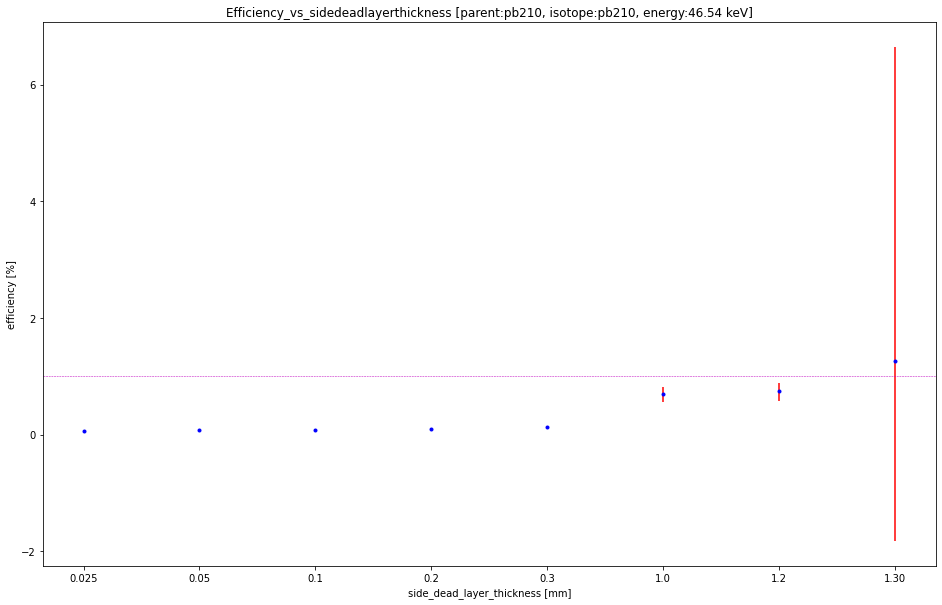

In [66]:
grouping_columns=['parent','isotope','energy']
grouped=df_plot.groupby(grouping_columns)

#get individual group
for c,(grouping_columns, group) in enumerate(grouped):
    print(f'\n{c+1}:group:\n{group.reset_index(drop=True).to_string()}')
    
    #getting a plot
    # df=group.copy()
    get_plot_parent_isotope_energy(group)

In [37]:
#df_plot.iloc[6:,:].plot(x='side_dead_layer_thickness(mm)',y='efficiency',grid=True,figsize=(12,8),yerr=df_plot['y_error'],style='.')
# #title info
# parent=df_plot['parent'].loc[0]
# isotope=df_plot['isotope'].loc[0]
# energy=df_plot['energy'].loc[0]
# parent,isotope,energy

# title_name=f'Efficiency_vs_sidedeadlayerthickness [parent:{parent}, isotope:{isotope}, energy:{energy:0.2f} keV]'
# save_name=f'efficiency_{parent}_{isotope}_{energy:.2f}'
# save_name


In [21]:
# fig,ax=plt.subplots(figsize=(16,10))
# x=df_plot['side_dead_layer_thickness(mm)']
# y=df_plot['efficiency']
# y_error=[df_plot['error_minus'],df_plot['error_plus']]

# #fig,ax=plt.figure()

# ax.errorbar(x,y,y_error,ecolor='r',fmt='b.')
# h_line_style={'color':'m','linestyle':'--','linewidth':0.5}
# ax.axhline(y=1,**h_line_style)
# ax.set_xlabel('side_dead_layer_thickness [mm]')
# ax.set_ylabel('efficiency [%]')
# ax.set_title(title_name)

# plt.show()